## EDA-Exploratory Data Analysis

In [3]:
#Import necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz


In [ ]:
# Load the dataset into a Pandas dataframe
df = pd.read_csv('covid_impact_on_work_new.csv')
df.head()

,Stress_Level,Sector,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
0,Low,Retail,1,1,6.392.393.639.805.820,26.845.944.014.488.700,1,0,0,1,1,1,0,1,1
1,Low,IT,1,1,9.171.983.537.957.560,33.392.245.834.602.800,1,0,1,0,1,1,0,1,1
2,Medium,Retail,1,0,10.612.560.951.456.400,2.218.332.712.302.110,0,0,0,0,0,0,0,0,1
3,Medium,Education,1,1,5.546.168.647.409.510,5.150.566.193.312.910,0,0,0,0,1,0,0,0,1
4,Medium,Education,0,1,11.424.615.456.733.800,31.211.255.258.841.200,1,0,1,1,1,0,1,1,1


In [5]:
# Print out the basic info of the dataset to vew datatypes, column names, and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Stress_Level                   10000 non-null  object
 1   Sector                         10000 non-null  object
 2   Increased_Work_Hours           10000 non-null  int64 
 3   Work_From_Home                 10000 non-null  int64 
 4   Hours_Worked_Per_Day           10000 non-null  object
 5   Meetings_Per_Day               10000 non-null  object
 6   Productivity_Change            10000 non-null  int64 
 7   Health_Issue                   10000 non-null  int64 
 8   Job_Security                   10000 non-null  int64 
 9   Childcare_Responsibilities     10000 non-null  int64 
 10  Commuting_Changes              10000 non-null  int64 
 11  Technology_Adaptation          10000 non-null  int64 
 12  Salary_Changes                 10000 non-null  int64 
 13  Te

In [6]:
# Print out column names to make sure there are no leading or trailing spaces
print(df.columns)

Index(['Stress_Level', 'Sector', 'Increased_Work_Hours', 'Work_From_Home',
       'Hours_Worked_Per_Day', 'Meetings_Per_Day', 'Productivity_Change',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Team_Collaboration_Challenges', 'Affected_by_Covid'],
      dtype='object')


In [7]:
# Checking for missing values
print(df.isnull().sum())

Stress_Level                     0
Sector                           0
Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Affected_by_Covid                0
dtype: int64


## Analysis and Visualizations

In [ ]:
# Run a statistical summary on all columns of the dataframe to get an 
# overall understanding of the data before graphing
print(df.describe())

       Increased_Work_Hours  Work_From_Home  Productivity_Change  \
count          10000.000000    10000.000000          10000.00000   
mean               0.676900        0.803300              0.50220   
std                0.467684        0.397523              0.50002   
min                0.000000        0.000000              0.00000   
25%                0.000000        1.000000              0.00000   
50%                1.000000        1.000000              1.00000   
75%                1.000000        1.000000              1.00000   
max                1.000000        1.000000              1.00000   

       Health_Issue  Job_Security  Childcare_Responsibilities  \
count  10000.000000  10000.000000                10000.000000   
mean       0.301100      0.404900                    0.396700   
std        0.458759      0.490897                    0.489237   
min        0.000000      0.000000                    0.000000   
25%        0.000000      0.000000                    0.000000 

# Basic Graphs

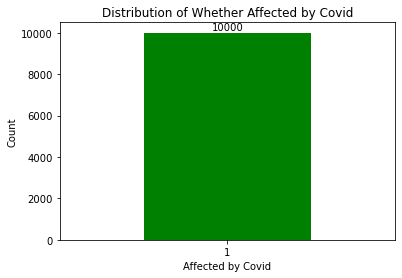

In [ ]:
# Count the occurrences of each class in 'Affected_by_Covid'
covid_counts = df['Affected_by_Covid'].value_counts()

# Create a bar plot
ax = covid_counts.plot(kind='bar', color=['green'])

# Adding labels and title
plt.xlabel('Affected by Covid')
plt.ylabel('Count')
plt.title('Distribution of Whether Affected by Covid')
plt.xticks(rotation=0)  # Keep the x-tick labels horizontal

# Add value counts on top of the bars
for i, v in enumerate(covid_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

This graph shows that all 10,000 people in this data pool have been affected by COVID.

In [27]:
#Group by Stress Level then Affected by Covid
covid_by_stress_level = df.groupby('Stress_Level')['Affected_by_Covid'].sum()
covid_by_stress_level


Stress_Level
High      3036
Low       2008
Medium    4956
Name: Affected_by_Covid, dtype: int64

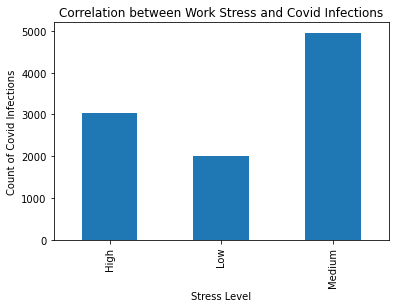

In [28]:
# Visualization
covid_by_stress_level.plot(kind='bar')
plt.xlabel('Stress Level')
plt.ylabel('Count of Covid Infections')
plt.title('Correlation between Work Stress and Covid Infections')
plt.show()

We also want to look if there is a correlation between the job stress level and the sector of the work.

In [13]:
# Use the df where we can combine "Stress_Level" and "Sector" into an empty column, which we will use a concatenator and place it in the new column name
df['Sector-Stress'] = df['Stress_Level'] + '-' + df['Sector']

# Group the dataframe by the newly created 'Sector-Stress' column and calculate the sum of 'Affected_by_Covid' for each group
covid_by_sector_and_stress = df.groupby('Sector-Stress')['Affected_by_Covid'].sum()

# Sort the resulting series in descending order based on the total number of people affected by COVID-19 in each group
covid_by_sector_and_stress = covid_by_sector_and_stress.sort_values(ascending=False)

# Display the final sorted result, showing the total number of people affected by COVID-19 across each sector and stress level combination
covid_by_sector_and_stress

Sector-Stress
Medium-IT            1295
Medium-Education     1244
Medium-Retail        1218
Medium-Healthcare    1199
High-Retail           777
High-Healthcare       767
High-IT               751
High-Education        741
Low-Healthcare        532
Low-IT                500
Low-Education         499
Low-Retail            477
Name: Affected_by_Covid, dtype: int64

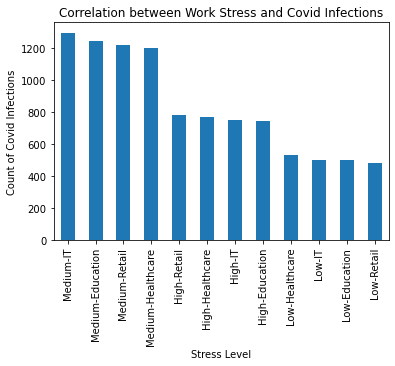

In [14]:
# Visualization
covid_by_sector_and_stress.plot(kind='bar')
plt.xlabel('Stress Level')
plt.ylabel('Count of Covid Infections')
plt.title('Correlation between Work Stress and Covid Infections')
plt.show()

As we can see, the low impact jobs had a lower count of COVID cases. However, the high impact jobs were in the middle of the Count of COVID infections and were not the highest count.